In [1]:
import matplotlib.pyplot as plt
import numpy as np
import diagnostics as diag
import numpy.ma as ma
from iosubdomains import Variable

In [2]:
exp = diag.plume('../../data/Nyles/plume_nonrot/', 'plume_nonrot')
time = exp.time/3600/24
r_lim = 0.35
z_lim = 0.6

In [3]:
Ea = exp.Volume_integral('APE', r_lim, z_lim)

In [4]:
Ek = exp.Volume_integral('KE', r_lim, z_lim)

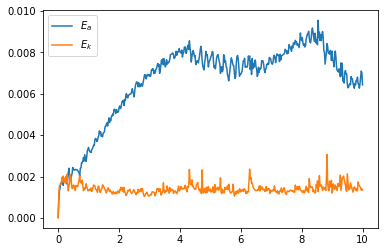

In [5]:
plt.plot(time, Ea, label='$E_a$')
plt.plot(time, Ek, label='$E_k$')
plt.legend()

In [3]:
ϕb = exp.Volume_integral('phi_b', r_lim, z_lim)

In [4]:
ϕz = exp.Volume_integral('phi_z', r_lim, z_lim)

In [5]:
ϕp = exp.vertical_pressure_flux(r_lim, z_lim)

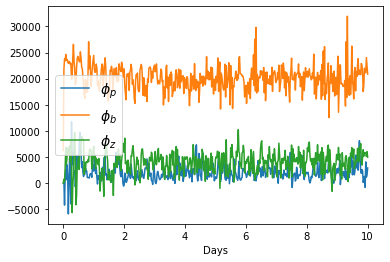

In [6]:
plt.plot(time, ϕp, label='$\phi_{p}$')
plt.plot(time, ϕb, label='$\phi_{b}$')
plt.plot(time, ϕz, label='$\phi_{z}$')
#plt.plot(time, ϕp_2, label='$\phi_{p}$2')
plt.legend(fontsize=14)
plt.xlabel('Days')
plt.savefig('../../Desktop/figs_plume/fluxes_phi_p_dominant_Lx_nx')

In [18]:
ϵ_k = ϕz - ϕp

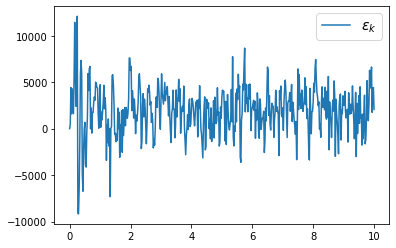

In [19]:
plt.plot(time, ϵ_k, label='$\epsilon_k$')
plt.legend(fontsize=14)
plt.savefig('../../Desktop/figs_plume/expsilon_k')

In [7]:
ε = (ϕb - ϕz)/(ϕb + ϕp)

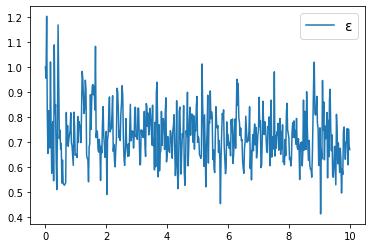

In [16]:
plt.plot(time, ε, label='ε')
plt.legend(fontsize=14)
plt.savefig('../../Desktop/figs_plume/mixing_efficiency')